In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("bankloan.csv")
df=df.drop(["ID","ZIP.Code"],axis=1)
print(f"Shape: {df.shape}")
print(f"Size: {df.size}")

Shape: (5000, 12)
Size: 60000


In [3]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Age – Customer’s age in years  
Type: Numeric (Ratio)

Experience – Years of professional experience  
Type: Numeric (Ratio)

Income – Annual income in thousands  
Type: Numeric (Ratio)

Family – Family size (number of members)  
Type: Numeric (Ratio)

CCAvg – Average monthly credit card spending in thousands  
Type: Numeric (Ratio)

Education – Education level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)  
Type: Categorical (Ordinal)

Mortgage – Value of house mortgage in thousands  
Type: Numeric (Ratio)

Personal.Loan – Whether the customer got the loan (0 = No, 1 = Yes)  
Type: Categorical (Binary, Nominal)

Securities.Account – Whether the customer has a securities account (0 = No, 1 = Yes)  
Type: Categorical (Binary, Nominal)

CD.Account – Whether the customer has a certificate of deposit account (0 = No, 1 = Yes)  
Type: Categorical (Binary, Nominal)

Online – Whether the customer uses internet banking (0 = No, 1 = Yes)  
Type: Categorical (Binary, Nominal)

CreditCard – Whether the customer uses a credit card issued by the bank (0 = No, 1 = Yes)  
Type: Categorical (Binary, Nominal)


In [4]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0
CD.Account,0


In [5]:
df.duplicated().sum()

np.int64(13)

In [6]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df=df[df["Experience"]>=0]

df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['Age'].kurtosis()

np.float64(-1.1620001390828665)

In [9]:
def statistical_description(df):
  num_col = df.select_dtypes(include=["int","float"]).columns

  mean = []
  med = []
  mode = []
  range = []
  IQR = []
  stdev = []
  min = []
  max = []
  skew = []
  kurt = []
  for i in num_col:
    mean_i = round(df[i].mean(),2)
    median_i = round(df[i].median(),2)
    mode_i = round(df[i].mode()[0],2)
    max_i = df[i].max()
    min_i = df[i].min()
    range_i = round(max_i - min_i,2)
    q1 = int(df[i].quantile(0.25))
    q3 = int(df[i].quantile(0.75))
    IQR_i = (q1,q3)
    stdev_i = round(df[i].std(),3)
    skew_i = round(df[i].skew(),2)
    kurt_i = round(df[i].kurtosis(),2)
    mean.append(mean_i)
    med.append(median_i)
    mode.append(mode_i)
    range.append(range_i)
    IQR.append(IQR_i)
    stdev.append(stdev_i)
    min.append(min_i)
    max.append(max_i)
    skew.append(skew_i)
    kurt.append(kurt_i)
  stats = {"Mean": mean,"Median":med, "Mode": mode, "Min": min, "Max": max, "Range": range, "IQR": IQR,"Stdev": stdev,"Skewness":skew, "Kurtosis":kurt}
  df_stats = pd.DataFrame(stats,index=num_col)
  return df_stats.T


statistical_description(df)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
Mean,45.56,20.33,73.81,2.39,1.94,1.88,56.63,0.1,0.1,0.06,0.6,0.29
Median,46.0,20.0,64.0,2.0,1.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0
Mode,35.0,32.0,44.0,1.0,0.3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Min,24.0,0.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,67.0,43.0,224.0,4.0,10.0,3.0,635.0,1.0,1.0,1.0,1.0,1.0
Range,43.0,43.0,216.0,3.0,10.0,2.0,635.0,1.0,1.0,1.0,1.0,1.0
IQR,"(36, 55)","(10, 30)","(39, 98)","(1, 3)","(0, 2)","(1, 3)","(0, 101)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(0, 1)"
Stdev,11.321,11.312,46.113,1.148,1.748,0.84,101.829,0.296,0.306,0.239,0.491,0.456
Skewness,-0.02,-0.01,0.84,0.16,1.59,0.23,2.1,2.72,2.59,3.67,-0.4,0.9
Kurtosis,-1.16,-1.14,-0.05,-1.4,2.64,-1.54,4.77,5.42,4.71,11.46,-1.84,-1.18


In [10]:
!pip install groq seaborn matplotlib scipy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.3 MB/s eta 0:00:00


In [11]:
import os
from groq import Groq
from IPython.display import Image, display, Markdown

In [12]:
# GROQ_API_KEY = "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"
# client = Groq(api_key=GROQ_API_KEY)

# def plot_and_save_all(df, save_dir="plots"):
#     os.makedirs(save_dir, exist_ok=True)
#     num_cols = df.select_dtypes(include=["int64", "float64"]).columns
#     plot_paths = []

#     sns.set(style="whitegrid", palette="pastel")

#     for col in num_cols:
#         plt.figure(figsize=(14, 10))

#         # Boxplot
#         plt.subplot(3, 2, 1)
#         sns.boxplot(x=df[col], color="skyblue")
#         plt.title(f"Boxplot - {col}")

#         # Distplot
#         plt.subplot(3, 2, 2)
#         sns.histplot(df[col], kde=True, bins=25, color="orange")
#         plt.title(f"Distplot - {col}")

#         # Histogram
#         plt.subplot(3, 2, 3)
#         plt.hist(df[col], bins=25, edgecolor='black')
#         plt.title(f"Histogram - {col}")

#         # Q-Q Plot
#         plt.subplot(3, 2, 4)
#         stats.probplot(df[col].dropna(), dist="norm", plot=plt)
#         plt.title(f"Q-Q Plot - {col}")

#         # Q-Plot
#         plt.subplot(3, 2, 5)
#         sorted_data = np.sort(df[col].dropna())
#         quantiles = np.linspace(0, 1, len(sorted_data))
#         plt.plot(quantiles, sorted_data)
#         plt.title(f"Q-Plot (Quantile Plot) - {col}")

#         # Scatter Plot
#         plt.subplot(3, 2, 6)
#         plt.scatter(range(len(df[col])), df[col], alpha=0.6)
#         plt.title(f"Scatter Plot - {col}")
#         plt.xlabel("Index")
#         plt.ylabel(col)

#         plt.tight_layout()
#         path = f"{save_dir}/{col}.png"
#         plt.savefig(path)
#         plt.close()
#         plot_paths.append((col, path))

#     return plot_paths


# # ==================== SUMMARIZER ====================
# def summarize_plot_textually(df, column_name):
#     col_data = df[column_name].dropna()
#     desc = col_data.describe().to_dict()

#     skew = col_data.skew()
#     kurt = col_data.kurtosis()

#     summary_text = f"""
#     Column: {column_name}
#     Count: {desc.get('count', 0)}
#     Mean: {desc.get('mean', 0):.2f}
#     Std: {desc.get('std', 0):.2f}
#     Min: {desc.get('min', 0):.2f}
#     25%: {desc.get('25%', 0):.2f}
#     Median: {desc.get('50%', 0):.2f}
#     75%: {desc.get('75%', 0):.2f}
#     Max: {desc.get('max', 0):.2f}
#     Skewness: {skew:.2f}
#     Kurtosis: {kurt:.2f}
#     """

#     prompt = f"Here is the statistical summary of the column:\n{summary_text}\n\nPlease describe the shape, spread, possible outliers, and data pattern in simple words."

#     response = client.chat.completions.create(
#         model="llama-3.1-8b-instant",
#         messages=[
#             {"role": "system", "content": "You are a data analyst describing numeric distributions clearly."},
#             {"role": "user", "content": prompt}
#         ],
#     )

#     return response.choices[0].message.content


# # ==================== RUN EVERYTHING ====================
# def analyze_with_llm(df):
#     plots = plot_and_save_all(df)
#     for col, path in plots:
#         display(Markdown(f"## 📊 {col}"))
#         display(Image(filename=path, width=600))
#         summary = summarize_plot_textually(df, col)
#         display(Markdown(f"**LLM Summary:**\n\n{summary}"))


# # Example:
# analyze_with_llm(df[["Age","Experience","Income","Family","Mortgage"]])


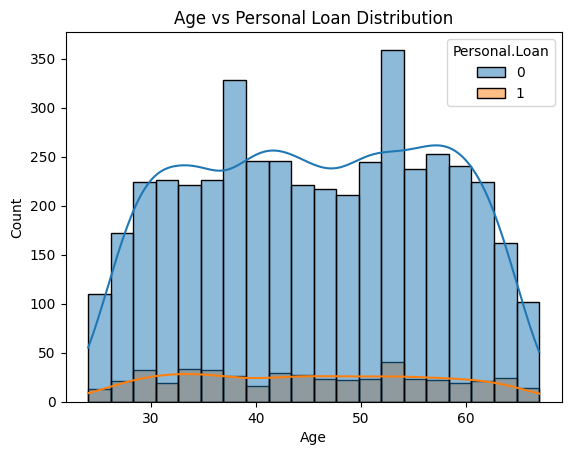

In [13]:
sns.histplot(data=df, x="Age", hue="Personal.Loan", kde=True, bins=20)
plt.title("Age vs Personal Loan Distribution")
plt.show()

<Axes: >

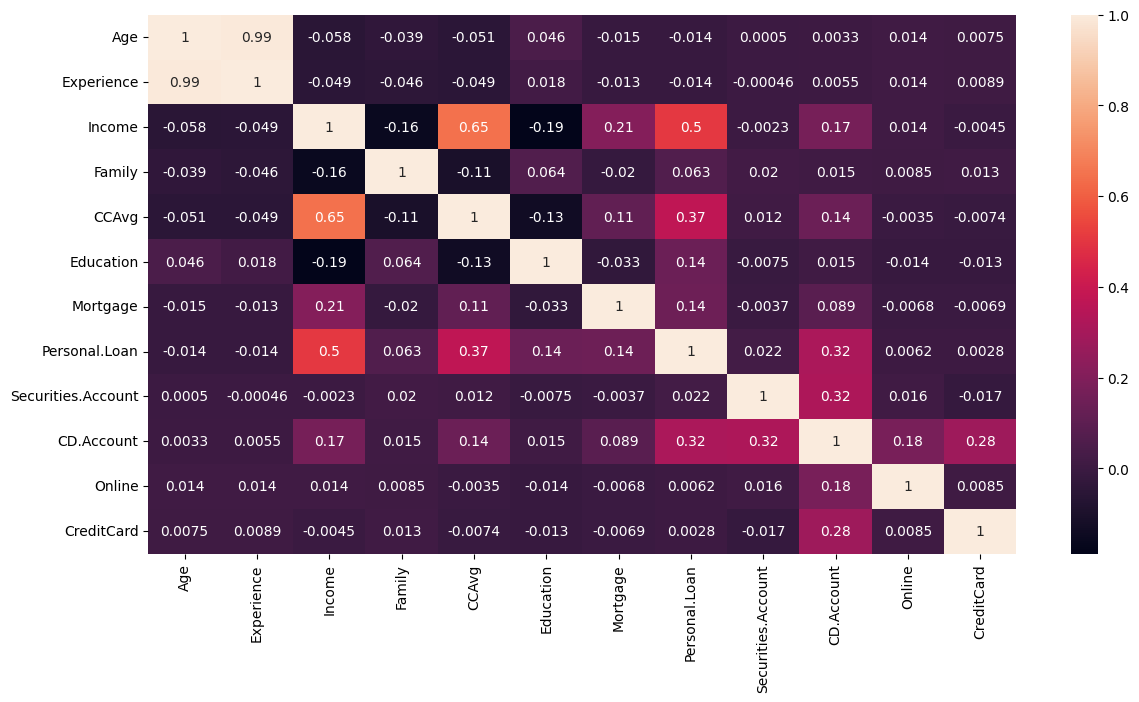

In [14]:
cor=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

Text(0.5, 1.0, 'Pie Chart of CD.Account')

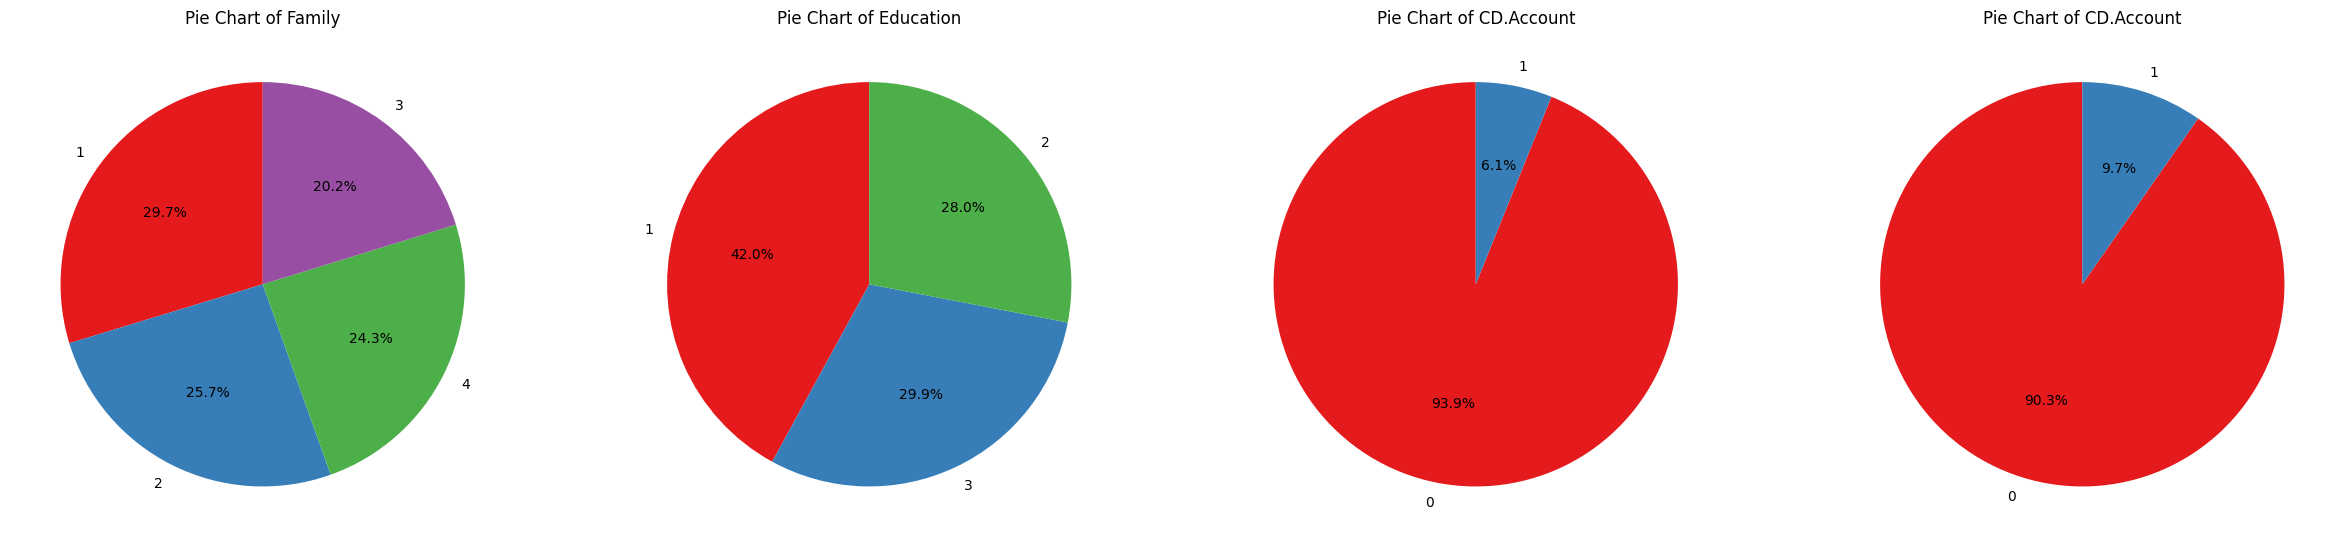

In [15]:
cat_count_Family=df["Family"].value_counts()
cat_count_Personal_loan=df["Personal.Loan"].value_counts()
cat_count_Education=df["Education"].value_counts()
cat_count_CDAcc=df["CD.Account"].value_counts()


cat_list=[cat_count_Family,cat_count_Education,cat_count_CDAcc,cat_count_Personal_loan]
plt.figure(figsize=(30,8))
plt.subplot(141)
_=plt.pie(cat_list[0],labels=cat_list[0].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of Family")

plt.subplot(142)
_=plt.pie(cat_list[1],labels=cat_list[1].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[1])))
plt.title(f"Pie Chart of Education")

plt.subplot(143)
_=plt.pie(cat_list[2],labels=cat_list[2].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[2])))
plt.title(f"Pie Chart of CD.Account")

plt.subplot(144)
_=plt.pie(cat_list[3],labels=cat_list[3].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[3])))
plt.title(f"Pie Chart of CD.Account")

**Some high income personal did not get the loan**

In [16]:
# !pip install imbalanced-learn --quiet

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("Personal.Loan", axis=1)
y = df["Personal.Loan"]

print("Before SMOTE:")
print(y.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nAfter SMOTE:")
print(y_resampled.value_counts())

# Combine back into a DataFrame
df_final = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                      pd.Series(y_resampled, name="Personal.Loan")], axis=1)

print(f"\nFinal balanced dataset shape: {df_final.shape}")
print(df_final['Personal.Loan'].value_counts())


Before SMOTE:
Personal.Loan
0    4468
1     480
Name: count, dtype: int64

After SMOTE:
Personal.Loan
0    4468
1    4468
Name: count, dtype: int64

Final balanced dataset shape: (8936, 12)
Personal.Loan
0    4468
1    4468
Name: count, dtype: int64


**Data was imbalances so we have balanced the data by applying SMOTE technique.**

Text(0.5, 1.0, 'Pie Chart of CD.Account')

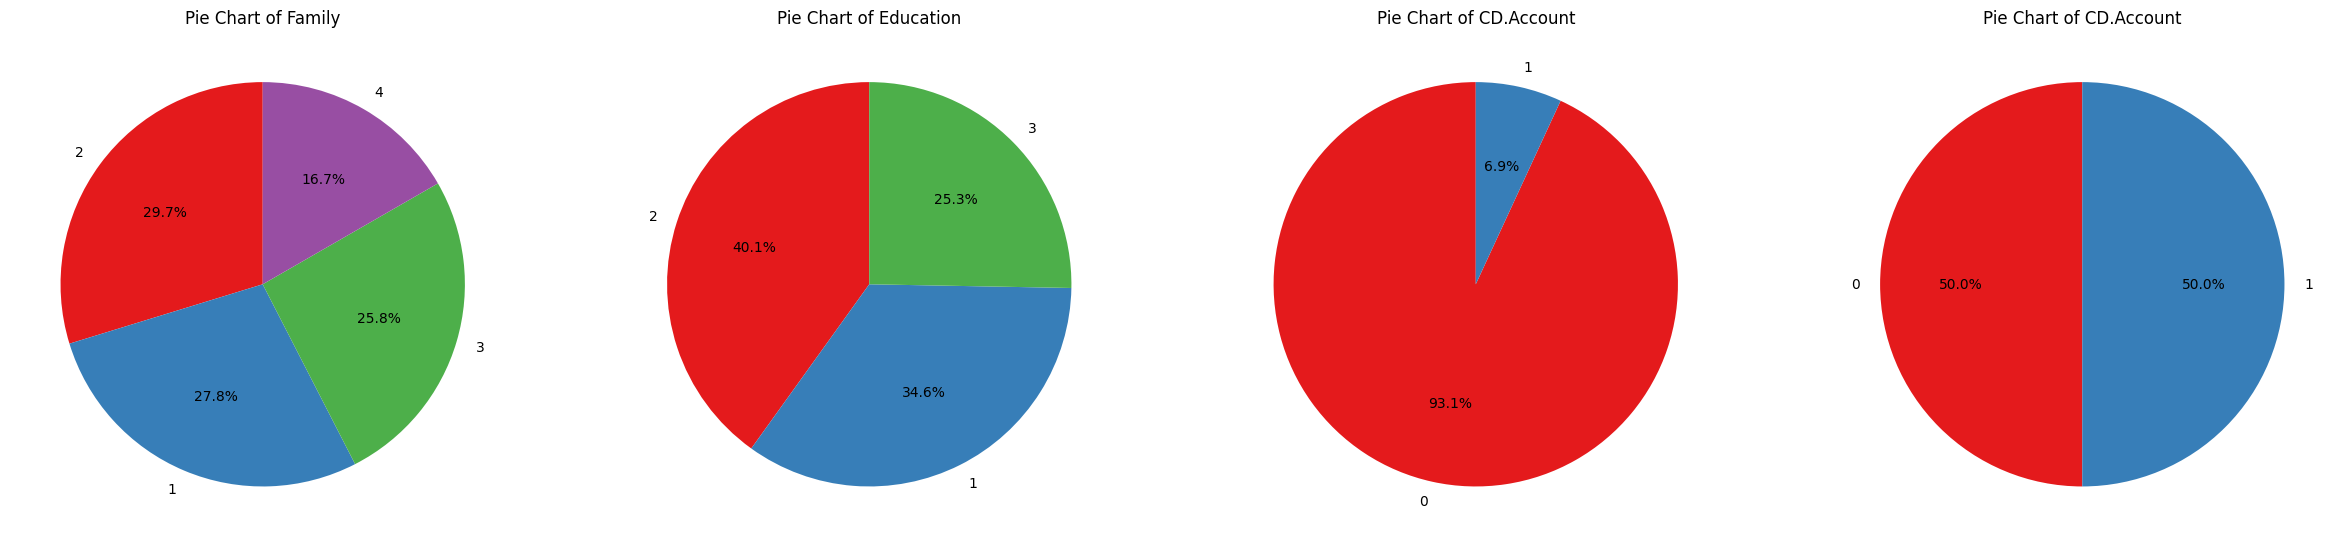

In [18]:
cat_count_Family=df_final["Family"].value_counts()
cat_count_Personal_loan=df_final["Personal.Loan"].value_counts()
cat_count_Education=df_final["Education"].value_counts()
cat_count_CDAcc=df_final["CD.Account"].value_counts()


cat_list=[cat_count_Family,cat_count_Education,cat_count_CDAcc,cat_count_Personal_loan]
plt.figure(figsize=(30,8))
plt.subplot(141)
_=plt.pie(cat_list[0],labels=cat_list[0].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of Family")

plt.subplot(142)
_=plt.pie(cat_list[1],labels=cat_list[1].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[1])))
plt.title(f"Pie Chart of Education")

plt.subplot(143)
_=plt.pie(cat_list[2],labels=cat_list[2].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[2])))
plt.title(f"Pie Chart of CD.Account")

plt.subplot(144)
_=plt.pie(cat_list[3],labels=cat_list[3].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[3])))
plt.title(f"Pie Chart of CD.Account")

In [19]:
df=df_final.drop(["Age","Experience","Online","CreditCard","Securities.Account"],axis=1)
df=df.reset_index(drop=True)
df.head()

,Income,Family,CCAvg,Education,Mortgage,CD.Account,Personal.Loan
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


1. **Personal loan is highly correlated with income and CC Avg,**
2. **CCavg and Income has high multicolinearity.**

**"CCAvg" and "Mortage" features consists outliers**

**Here, we can see the distribution of Family, Education,CD Account,Security Accounts**
1. There are most of the people without CD account.

**People with high income, CC Avg, Mortage and Eduction level are most likely to get a Personal loan**

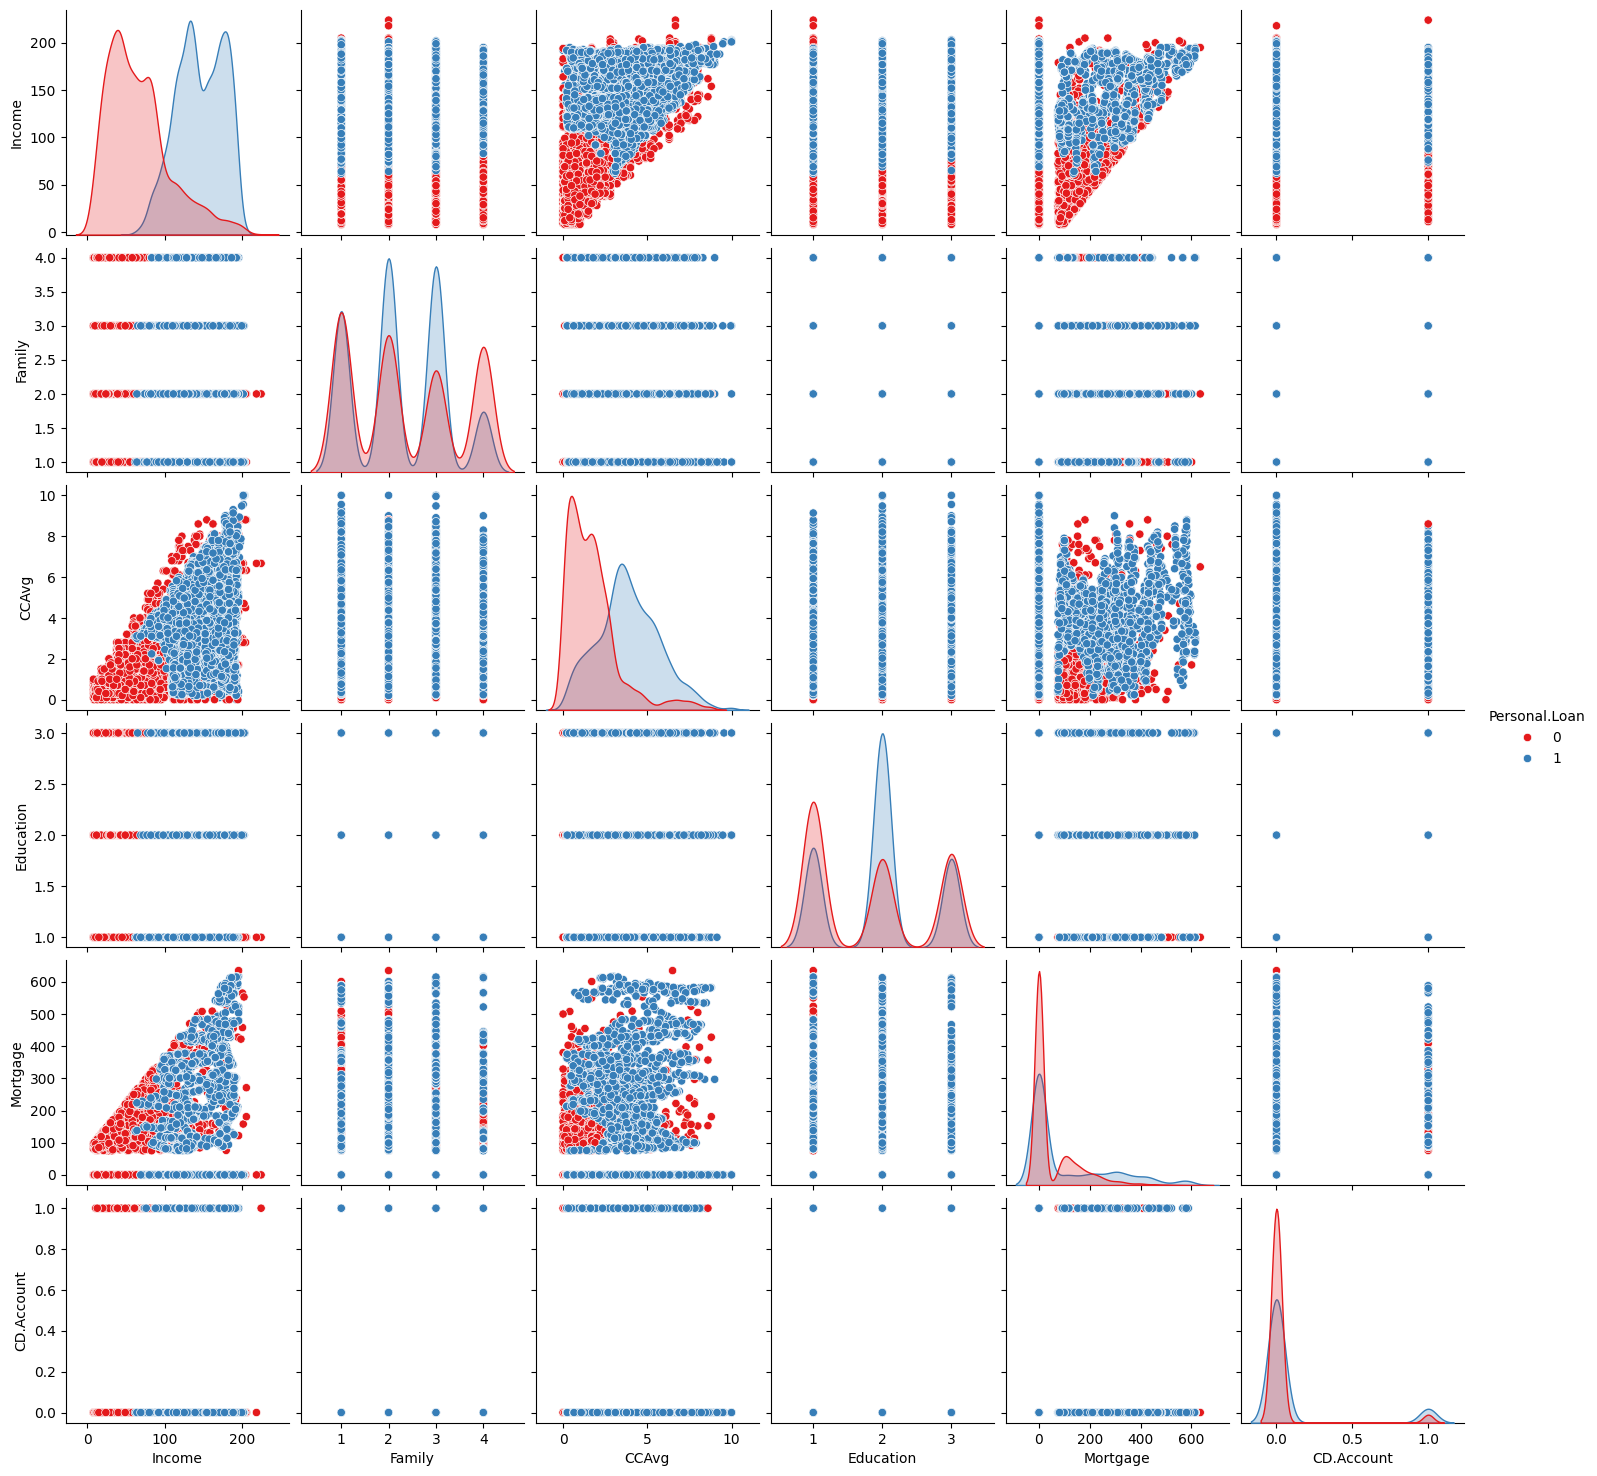

In [21]:
sns.pairplot(df,hue="Personal.Loan",palette="Set1")

<Axes: xlabel='Personal.Loan', ylabel='Education'>

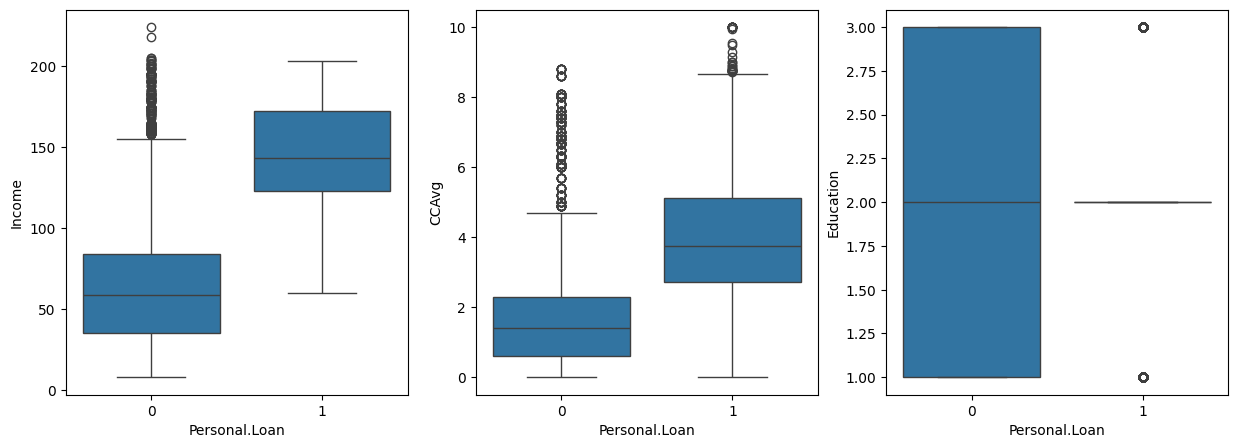

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(x="Personal.Loan", y="Income", data=df)
plt.subplot(132)
sns.boxplot(x="Personal.Loan", y="CCAvg", data=df)
plt.subplot(133)
sns.boxplot(x="Personal.Loan", y="Education", data=df)

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Education'], df['CD.Account'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.3f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p_value:.5f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("\n📊 Conclusion: Reject the Null Hypothesis (Dependent relationship exists)")
else:
    print("\n📈 Conclusion: Fail to Reject the Null Hypothesis (Independent relationship)")


Contingency Table:
CD.Account     0    1
Education            
1           2893  201
2           3303  279
3           2124  136

Chi-Square Test Results:
Chi2 Statistic = 7.936
Degrees of Freedom = 2
P-value = 0.01891

📊 Conclusion: Reject the Null Hypothesis (Dependent relationship exists)


Text(0.5, 1.0, 'Heatmap of Correlation')

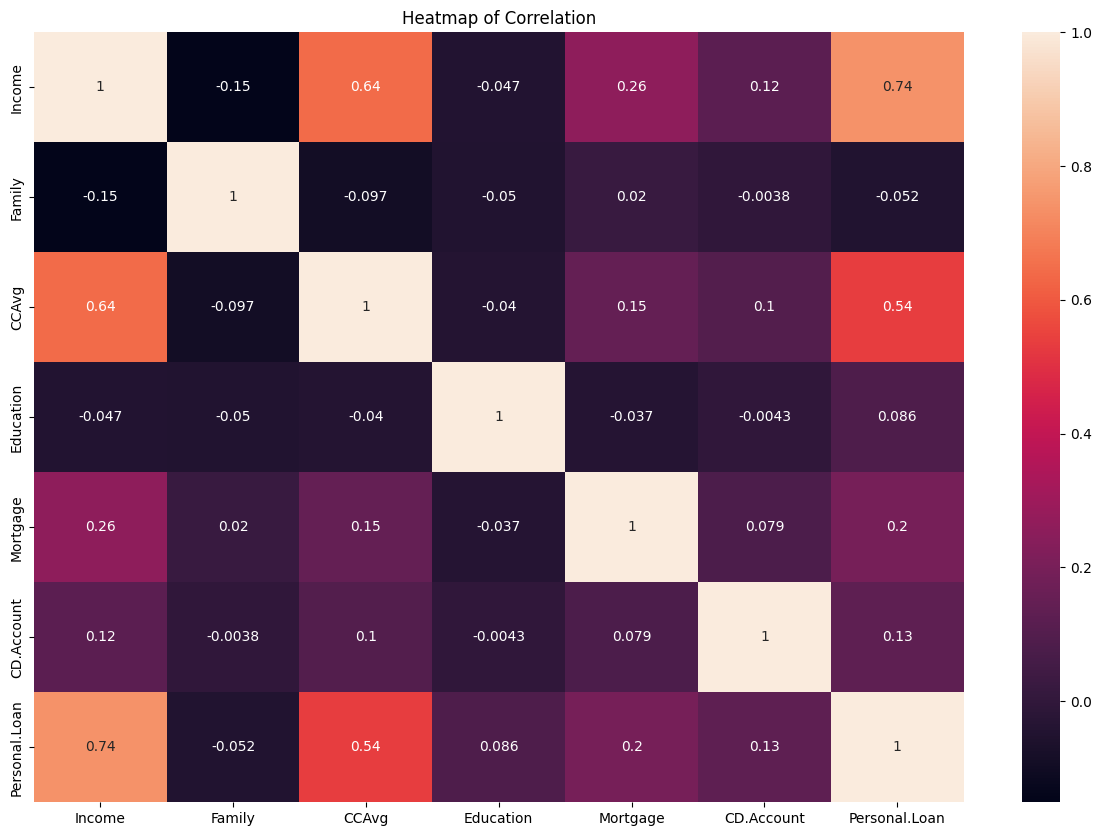

In [37]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.title("Heatmap of Correlation")

In [48]:
!pip install ppscore --no-deps --quiet



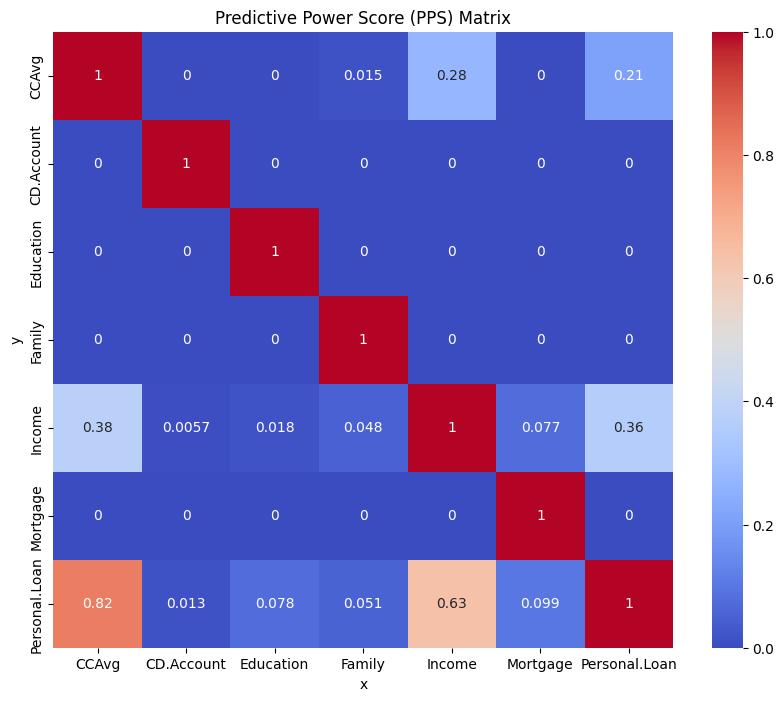

In [49]:
import ppscore as pps
pps_matrix = pps.matrix(df)

# Step 3: pivot for heatmap
pps_heatmap = pps_matrix.pivot(columns='x', index='y', values='ppscore')

# Step 4: visualize
plt.figure(figsize=(10,8))
sns.heatmap(pps_heatmap, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

In [70]:
def outliers(df, df_num_col):
    lower_lim = []
    upper_lim = []
    outlier_num = []
    for col in df_num_col:
      mean = df[col].mean()
      stdev = df[col].std()
      Lower_lim = mean - 3*stdev
      Upper_lim = mean + 3*stdev
      lower_lim.append(Lower_lim)
      upper_lim.append(Upper_lim)
      outliers_in_column = df[(df[col] < Lower_lim) | (df[col] > Upper_lim)]
      outlier_num.append(len(outliers_in_column))
    outlier_df = pd.DataFrame({
        'Column': df_num_col,
        'Lower Limit': lower_lim,
        'Upper Limit': upper_lim,
        'No of Outliers': outlier_num
    })

    return outlier_df



outliers(df,["CCAvg","Income","Mortgage"])

,Column,Lower Limit,Upper Limit,No of Outliers
0,CCAvg,-3.251244,8.867485,21
1,Income,-54.135342,265.427643,0
2,Mortgage,-326.475710,483.154090,159


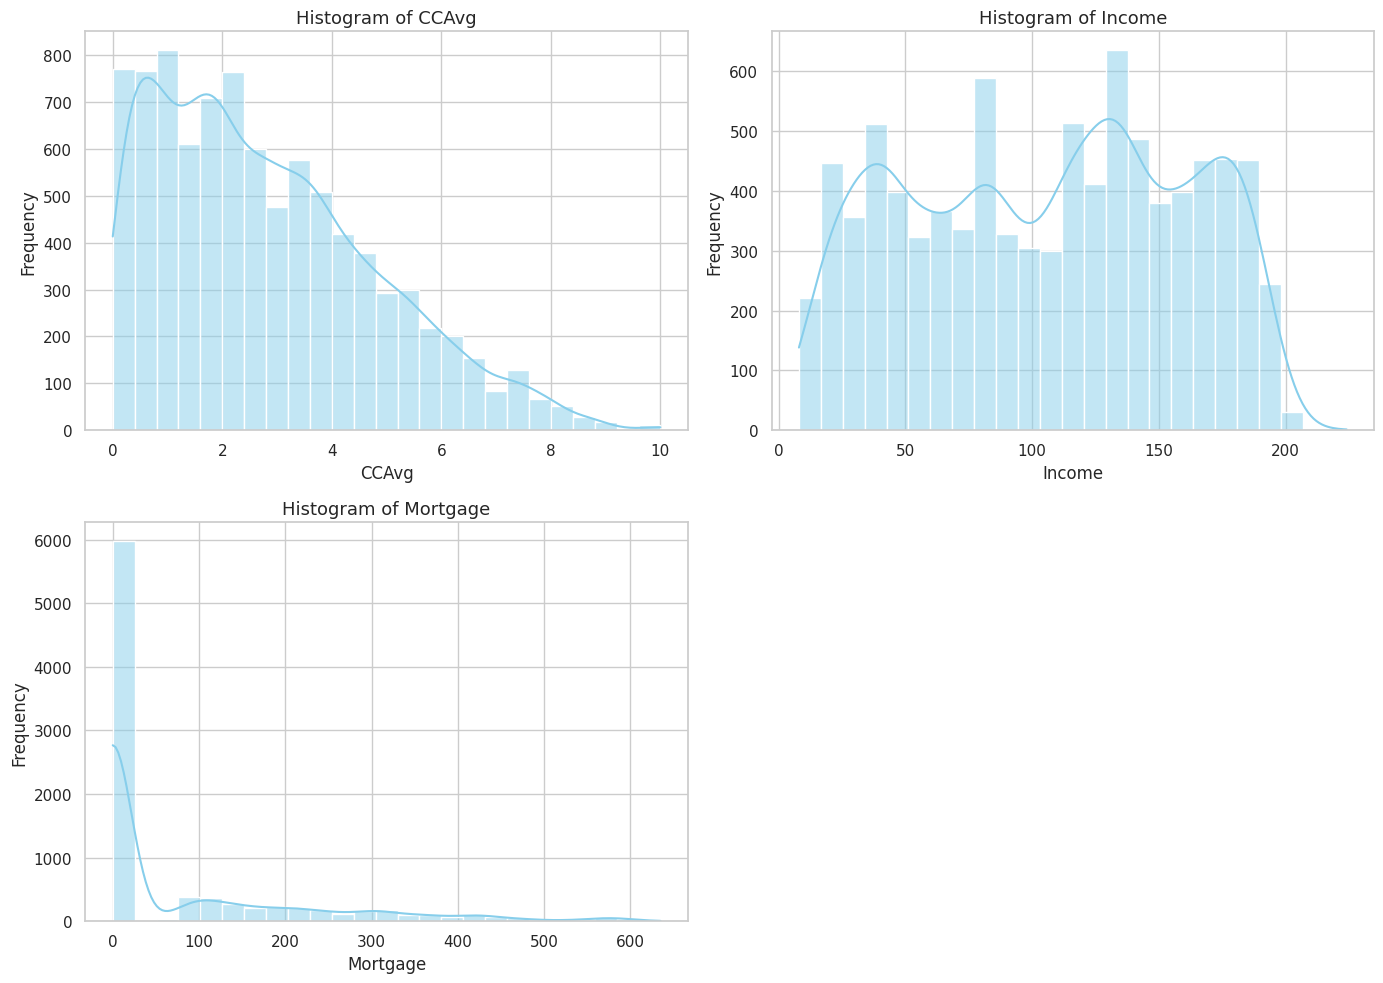

In [72]:
cols = ["CCAvg", "Income", "Mortgage"]

# style setup
sns.set(style="whitegrid", palette="pastel")

# plot
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color="skyblue")
    plt.title(f"Histogram of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [73]:
for i in ["CCAvg","Family","Income","Mortgage"]:
  mean = df[i].mean()
  stdev = df[i].std()
  lower_lim = mean - 3*stdev
  upper_lim = mean + 3*stdev
  filt_df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]


outliers(filt_df,["CCAvg","Family","Income","Mortgage"])

,Column,Lower Limit,Upper Limit,No of Outliers
0,CCAvg,-3.229759,8.774226,32
1,Family,-0.845331,5.477210,0
2,Income,-53.984232,262.572360,0
3,Mortgage,-287.071664,426.064259,153


**After applying mean+_ 3 sigma method for trimming outliers and get rid of outliers.**

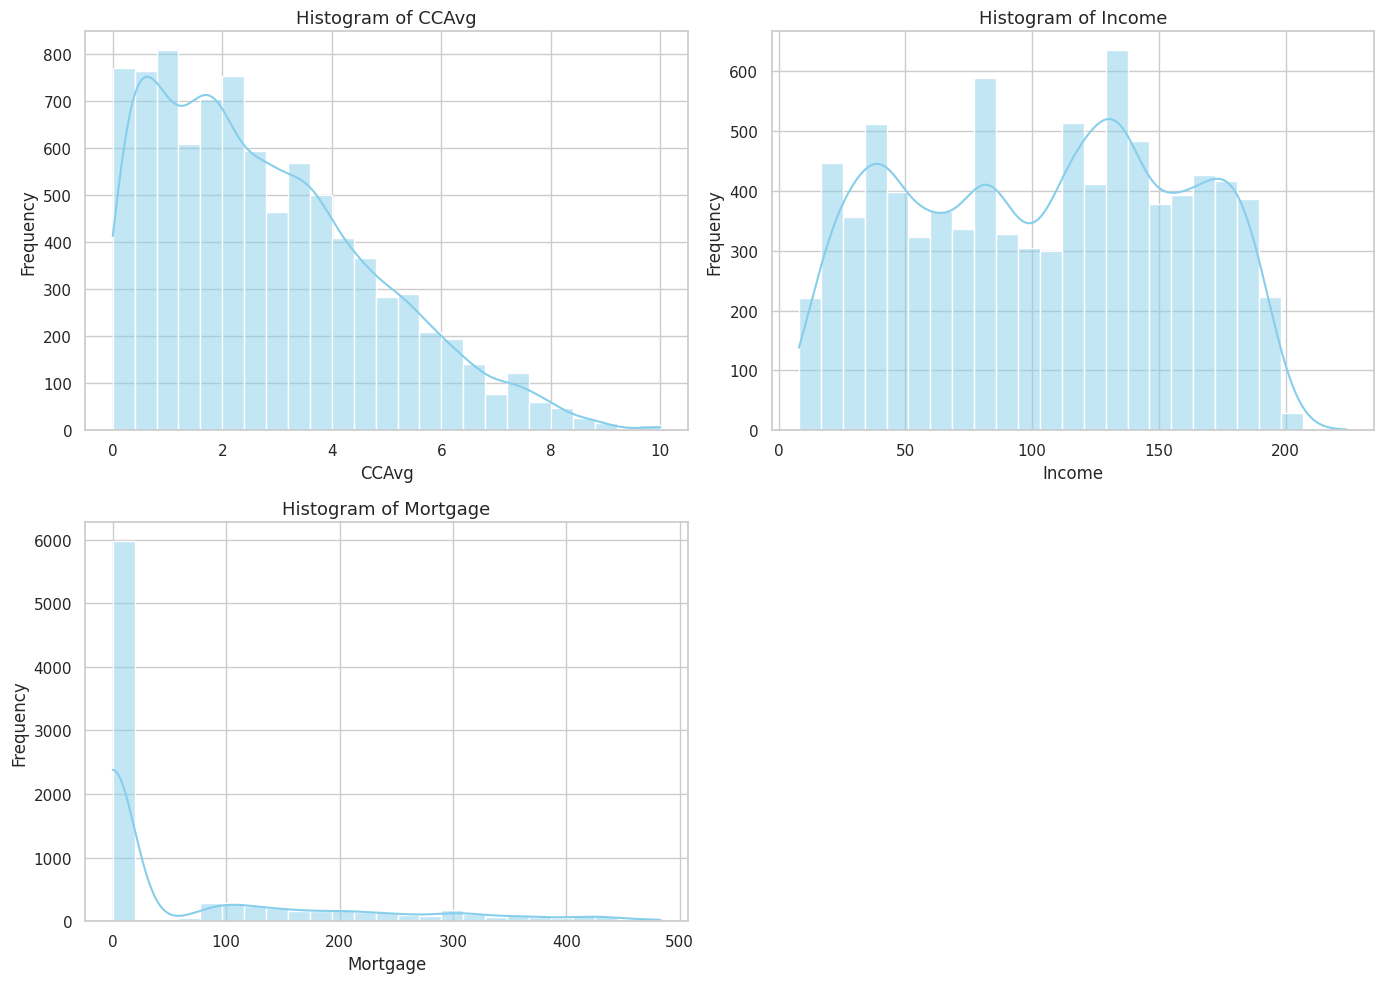

In [74]:
cols = ["CCAvg", "Income", "Mortgage"]

# style setup
sns.set(style="whitegrid", palette="pastel")

# plot
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(filt_df[col], kde=True, bins=25, color="skyblue")
    plt.title(f"Histogram of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [75]:
filt_df.isnull().sum()

,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
CD.Account,0
Personal.Loan,0


In [93]:
x=filt_df.drop(["Personal.Loan"],axis=1)
y=filt_df["Personal.Loan"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"The shape of X_train is {X_train.shape}\n The shape of X_test is {X_test.shape}\n The shape of Y_train is {Y_train.shape} \n The shape of Y_test is {Y_test.shape}")

The shape of X_train is (7021, 6)
 The shape of X_test is (1756, 6)
 The shape of Y_train is (7021,) 
 The shape of Y_test is (1756,)


In [86]:
skewness={}
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  val=X_train[i].skew()
  skewness[i]=val

pd.DataFrame([skewness])

,Income,Family,Education,CD.Account
0,-0.071759,0.216253,0.161206,3.470861


In [95]:
from sklearn.preprocessing import StandardScaler

num_cols = ["CCAvg", "Income", "Mortgage"]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [97]:
# ===================== IMPORTS =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.stats import ttest_ind

# ===================== PREPARE DATA =====================
# Example: if df is already loaded
# Replace 'Personal.Loan' with your actual target column name

X_train_v, X_test_v, Y_train_v, Y_test_v = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

# ===================== MODEL GRID =====================
models_params = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"max_depth": [3, 5, 10, None], "criterion": ["gini", "entropy"]}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {"n_estimators": [50, 100], "max_depth": [3, 5, None]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2]}
    ),
    "AdaBoost": (
        AdaBoostClassifier(),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="mlogloss", use_label_encoder=False),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
    )
}

# ===================== GRID SEARCH + RESULTS =====================
results = []
scores_dict = {}

for name, (model, params) in models_params.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_v, Y_train_v)

    # Predict on test
    y_pred_v = grid.best_estimator_.predict(X_test_v)
    acc = accuracy_score(Y_test_v, y_pred_v)

    # Get all 5-fold scores for sigma
    fold_scores = np.array([
        grid.cv_results_[f"split{i}_test_score"][grid.best_index_]
        for i in range(5)
    ])
    scores_dict[name] = fold_scores

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Mean CV Accuracy": fold_scores.mean(),
        "Std Dev (σ)": fold_scores.std(),
        "Test Accuracy": acc
    })

results_df = pd.DataFrame(results)
display(results_df)

# ===================== FIND BEST MODEL =====================
best_model_name = results_df.loc[results_df["Mean CV Accuracy"].idxmax(), "Model"]
print(f"\n🏆 Best Model (by mean CV accuracy): {best_model_name}\n")

# ===================== HYPOTHESIS TEST =====================
alpha = 0.05
for model_name, scores in scores_dict.items():
    if model_name == best_model_name:
        continue
    t_stat, p_val = ttest_ind(scores_dict[best_model_name], scores)
    print(f"{best_model_name} vs {model_name}: p-value = {p_val:.5f}")
    if p_val < alpha:
        print(" → Reject H₀: Significant difference ✅\n")
    else:
        print(" → Fail to reject H₀: No significant difference ❌\n")




Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training XGBoost...


,Model,Best Params,Mean CV Accuracy,Std Dev (σ),Test Accuracy
0,Logistic Regression,"{'C': 0.01, 'solver': 'liblinear'}",0.884438,0.007733,0.873310
1,Decision Tree,"{'criterion': 'entropy', 'max_depth': None}",0.969017,0.011900,0.972242
2,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.975960,0.004330,0.979359
3,Gradient Boosting,"{'learning_rate': 0.2, 'n_estimators': 100}",0.970975,0.003930,0.974377
4,AdaBoost,"{'learning_rate': 1, 'n_estimators': 100}",0.912928,0.007387,0.911032
5,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.970797,0.004342,0.973665



🏆 Best Model (by mean CV accuracy): Random Forest

Random Forest vs Logistic Regression: p-value = 0.00000
 → Reject H₀: Significant difference ✅

Random Forest vs Decision Tree: p-value = 0.30470
 → Fail to reject H₀: No significant difference ❌

Random Forest vs Gradient Boosting: p-value = 0.12660
 → Fail to reject H₀: No significant difference ❌

Random Forest vs AdaBoost: p-value = 0.00000
 → Reject H₀: Significant difference ✅

Random Forest vs XGBoost: p-value = 0.13072
 → Fail to reject H₀: No significant difference ❌



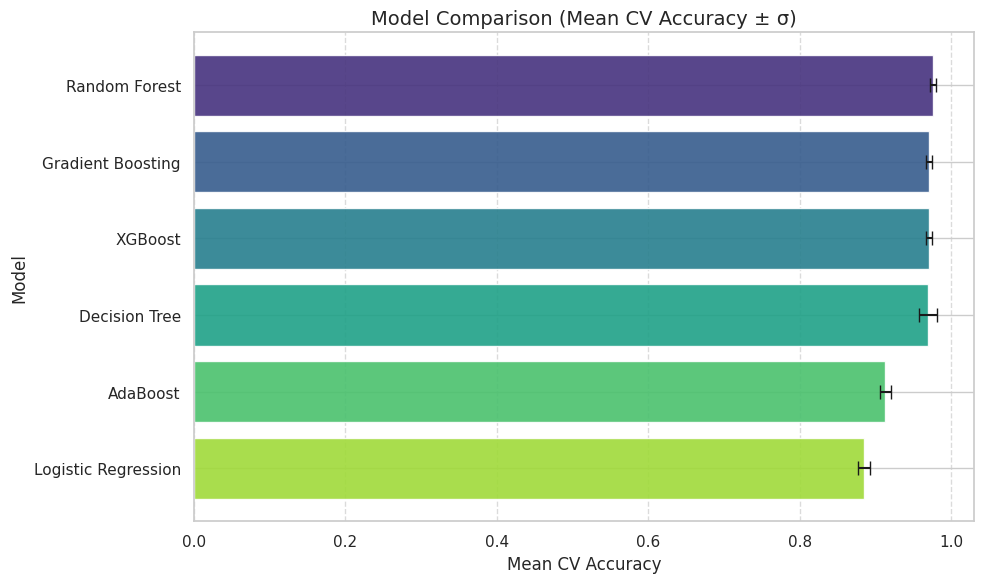

In [98]:
# ===================== VISUALIZATION =====================
plt.figure(figsize=(10, 6))

# Sort the DataFrame (important for consistent order)
sorted_df = results_df.sort_values(by="Mean CV Accuracy", ascending=False).reset_index(drop=True)

# Plot bar chart with error bars
bars = plt.barh(
    y=sorted_df["Model"],
    width=sorted_df["Mean CV Accuracy"],
    xerr=sorted_df["Std Dev (σ)"],
    color=sns.color_palette("viridis", len(sorted_df)),
    alpha=0.9,
    capsize=5
)

plt.title("Model Comparison (Mean CV Accuracy ± σ)", fontsize=14)
plt.xlabel("Mean CV Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.gca().invert_yaxis()  # highest accuracy on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [99]:
model_rf=RandomForestClassifier(max_depth=None,n_estimators=50)
model_rf.fit(X_train,Y_train)
y_pred=model_rf.predict(X_test)
score=round(model_rf.score(X_test,Y_test),3)
print(f'Accuracy is {score*100}%')

Accuracy is 97.8%


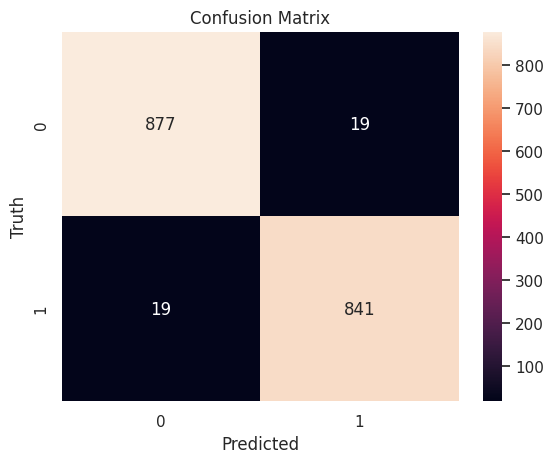

In [100]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(Y_test,y_pred)
sns.heatmap(con,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
_=plt.ylabel("Truth")

In [101]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       896
           1       0.98      0.98      0.98       860

    accuracy                           0.98      1756
   macro avg       0.98      0.98      0.98      1756
weighted avg       0.98      0.98      0.98      1756



In [106]:
import joblib

joblib.dump(scaler, "Loan_acceptance_model_scaler.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [103]:
import pickle
with open("Loan_acceptance_model.pkl", "wb") as file:
    pickle.dump(model_rf, file)

